In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from os.path import exists
import urllib, json
from pycaret.regression import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

sns.set(rc={'figure.figsize':(12,12)})
sns.set(font_scale = 1.5)

# Definições do Projeto

In [2]:
# Definição dos arquivos de origem dos dados
# Diretório
diretorio = './liberdade_economica/'

# Arquivo com os dados do índice de liberdade econômica
liberdade_economica_arquivo = 'heritage_org_2000-2021.csv'

# Arquivo com os dados do índice de desenvolvimento humano
idh_arquivo = 'idh.json'

# Índice de Liberdade Econômica

In [3]:
# Importando dataset com dados do índice de liberdade econômica
liberdade = pd.read_csv(diretorio+liberdade_economica_arquivo)

In [4]:
# Espiando amostra dos dados
liberdade.head()

,Name,Index Year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
0,Afghanistan,2021,53.0,30.3,29.1,25.7,91.1,76.1,99.9,53.9,59.9,80.8,68.6,10.0,10.0
1,Albania,2021,65.2,46.1,40.6,22.8,89.0,74.6,86.6,66.1,51.6,82.0,82.8,70.0,70.0
2,Algeria,2021,49.7,34.0,32.7,41.6,67.2,55.4,49.1,63.5,51.3,84.3,57.4,30.0,30.0
3,Angola,2021,54.2,30.3,20.4,22.8,87.3,86.9,77.9,56.9,59.6,67.5,70.2,30.0,40.0
4,Argentina,2021,52.7,46.1,54.0,45.7,70.4,52.8,38.4,59.5,46.3,41.9,62.6,55.0,60.0


In [5]:
# Traduzindo o nome das colunas
# ILE: Índice de liberdade econômica
liberdade.rename(columns={
                    "Name": "pais",
                    "Index Year": "ano",
                    "Overall Score": "ILE",
                    "Property Rights": "propriedade",
                    "Government Integrity": "governo_integridade",
                    "Judicial Effectiveness": "judiciario",
                    "Tax Burden": "tributos",
                    "Government Spending": "governo_gastos",
                    "Fiscal Health": "saude_fiscal",
                    "Business Freedom": "negocios",
                    "Labor Freedom": "trabalho",
                    "Monetary Freedom": "monetaria",
                    "Trade Freedom": "comercial",
                    "Investment Freedom": "investimentos",
                    "Financial Freedom": "financeira"}, inplace=True)

# Essa base será posteriormente cruzada com outra que engloba os anos 2010 a 2019
# Para facilitar o tratamento dos dados, vamos eliminar os anos desnecessários desde já
liberdade = liberdade[(liberdade.ano >= 2010) & (liberdade.ano <= 2019)]

# Primeira observação dos dados de Liberdade Econômica importados
liberdade.sample(10)

,pais,ano,ILE,propriedade,governo_integridade,judiciario,tributos,governo_gastos,saude_fiscal,negocios,trabalho,monetaria,comercial,investimentos,financeira
590,Colombia,2018,68.9,60.7,33.4,36.4,80.3,74.4,82.2,78.6,75.2,73.9,81.6,80.0,70.0
1204,Lebanon,2015,59.3,20.0,28.0,NaN,91.3,70.6,NaN,54.7,60.7,72.0,75.8,60.0,60.0
1744,Iran,2012,42.3,10.0,22.0,NaN,80.6,76.9,NaN,64.8,51.5,62.0,45.7,0.0,10.0
698,Senegal,2018,55.7,41.3,42.6,40.4,68.5,72.7,58.4,51.5,41.4,84.7,66.7,60.0,40.0
2018,The Bahamas,2011,68.0,70.0,55.0,NaN,97.2,86.9,NaN,72.5,81.3,74.6,42.2,30.0,70.0
1650,The Gambia,2013,58.8,30.0,35.0,NaN,75.1,82.7,NaN,59.5,59.3,71.1,60.5,65.0,50.0
579,Burkina Faso,2018,60.0,42.1,31.8,47.1,80.6,83.7,80.4,51.5,47.0,84.5,65.8,65.0,40.0
1901,Dominican Republic,2011,60.0,30.0,30.0,NaN,85.3,89.1,NaN,56.4,57.1,77.1,79.8,55.0,40.0
513,Serbia,2019,63.9,50.1,37.2,44.8,82.0,45.1,90.1,72.9,67.4,80.0,77.0,70.0,50.0
1213,Malawi,2015,54.8,40.0,37.0,NaN,78.5,49.0,NaN,49.1,63.1,53.8,72.2,55.0,50.0


In [6]:
# Quantidade de registros
print('Quantidade de registros: ', liberdade.shape[0])

# Quantidade de países
print('Quantidade de nomes de países (únicos): ', liberdade.pais.unique().shape[0])

# Verificando os anos com dados disponíveis
print('Anos (menor): ', liberdade['ano'].unique().min())
print('Anos (maior): ', liberdade['ano'].unique().max())
print('Anos (qtd): ', liberdade['ano'].unique().shape[0])

Quantidade de registros:  1853
Quantidade de nomes de países (únicos):  186
Anos (menor):  2010
Anos (maior):  2019
Anos (qtd):  10


In [7]:
# Verificando tipo dos dados e se existem objetos nulos
liberdade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1853 entries, 370 to 2222
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pais                 1853 non-null   object 
 1   ano                  1853 non-null   int64  
 2   ILE                  1788 non-null   float64
 3   propriedade          1815 non-null   float64
 4   governo_integridade  1831 non-null   float64
 5   judiciario           554 non-null    float64
 6   tributos             1804 non-null   float64
 7   governo_gastos       1814 non-null   float64
 8   saude_fiscal         552 non-null    float64
 9   negocios             1827 non-null   float64
 10  trabalho             1825 non-null   float64
 11  monetaria            1818 non-null   float64
 12  comercial            1807 non-null   float64
 13  investimentos        1819 non-null   float64
 14  financeira           1802 non-null   float64
dtypes: float64(13), int64(1), object(1)


In [8]:
# Países que possuem dados nulos
indice_nulos = liberdade['ILE'].isnull()
liberdade_nulos = liberdade[indice_nulos]

# Quantidade de registros sem dados de índice de liberdade econômica
print('Quantidade de registros sem índice de liberdade econômica: ', liberdade_nulos.shape[0])

# Países em que não há índice de liberdade econômica
print('Países sem índice de liberdade econômica: ', liberdade_nulos.pais.unique())

Quantidade de registros sem índice de liberdade econômica:  65
Países sem índice de liberdade econômica:  ['Iraq' 'Libya' 'Liechtenstein' 'Somalia' 'Syria' 'Yemen' 'Afghanistan'
 'Sudan' 'Kosovo']


In [9]:
# Exibindo registros sem dados de índice de liberdade econômica
liberdade_nulos.sample(20)

,pais,ano,ILE,propriedade,governo_integridade,judiciario,tributos,governo_gastos,saude_fiscal,negocios,trabalho,monetaria,comercial,investimentos,financeira
836,Liechtenstein,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.3,85.7,NaN,90.0,85.0,80.0
2009,Sudan,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
706,Somalia,2018,NaN,33.1,17.8,25.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650,Liechtenstein,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,85.0,80.0
715,Syria,2018,NaN,36.7,23.1,22.1,NaN,NaN,13.8,61.8,59.2,44.2,56.6,0.0,NaN
1755,Kosovo,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930,Iraq,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1385,Kosovo,2014,NaN,30.0,28.6,NaN,92.7,73.0,NaN,58.1,71.3,72.7,NaN,65.0,NaN
1450,Somalia,2014,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1021,Libya,2016,NaN,10.0,18.0,NaN,95.0,0.0,NaN,55.5,63.1,74.0,NaN,5.0,NaN


In [10]:
# Removendo países em que não há índice de liberdade econômica calculado
liberdade = liberdade[~indice_nulos]

# Verificando tipo dos dados e se existem objetos nulos
liberdade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1788 entries, 370 to 2222
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pais                 1788 non-null   object 
 1   ano                  1788 non-null   int64  
 2   ILE                  1788 non-null   float64
 3   propriedade          1788 non-null   float64
 4   governo_integridade  1788 non-null   float64
 5   judiciario           540 non-null    float64
 6   tributos             1788 non-null   float64
 7   governo_gastos       1788 non-null   float64
 8   saude_fiscal         540 non-null    float64
 9   negocios             1788 non-null   float64
 10  trabalho             1788 non-null   float64
 11  monetaria            1788 non-null   float64
 12  comercial            1788 non-null   float64
 13  investimentos        1788 non-null   float64
 14  financeira           1788 non-null   float64
dtypes: float64(13), int64(1), object(1)


In [11]:
# Verificando valores de liberdade do judiciário por ano
liberdade.groupby('ano')['judiciario'].sum()

ano
2010       0.0
2011       0.0
2012       0.0
2013       0.0
2014       0.0
2015       0.0
2016       0.0
2017    8093.1
2018    8581.0
2019    8196.5
Name: judiciario, dtype: float64

In [12]:
# Verificando valores de saúde fiscal por ano
liberdade.groupby('ano')['saude_fiscal'].sum()

ano
2010        0.0
2011        0.0
2012        0.0
2013        0.0
2014        0.0
2015        0.0
2016        0.0
2017    12232.0
2018    12152.4
2019    12044.1
Name: saude_fiscal, dtype: float64

In [13]:
# Substituindo valores nulos pelas médias
liberdade = liberdade.T.fillna(liberdade.drop(['ano','ILE'], axis=1).mean(axis=1)).T

# Caso fosse excluir os países com valores nulos, executaria o comando comentado abaixo
# liberdade.dropna(axis=0, how='any', inplace=True)

In [14]:
# A operação de transposição para substituição dos valores nulos pelas médias
# fez com que os dados numéricos fossem inferidos incorretamente como object
liberdade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1788 entries, 370 to 2222
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   pais                 1788 non-null   object
 1   ano                  1788 non-null   object
 2   ILE                  1788 non-null   object
 3   propriedade          1788 non-null   object
 4   governo_integridade  1788 non-null   object
 5   judiciario           1788 non-null   object
 6   tributos             1788 non-null   object
 7   governo_gastos       1788 non-null   object
 8   saude_fiscal         1788 non-null   object
 9   negocios             1788 non-null   object
 10  trabalho             1788 non-null   object
 11  monetaria            1788 non-null   object
 12  comercial            1788 non-null   object
 13  investimentos        1788 non-null   object
 14  financeira           1788 non-null   object
dtypes: object(15)
memory usage: 303.5+ KB


In [15]:
# Conversão de object para numérico
liberdade['ILE'] = pd.to_numeric(liberdade['ILE'], downcast="float")
liberdade['propriedade'] = pd.to_numeric(liberdade['propriedade'], downcast="float")
liberdade['governo_integridade'] = pd.to_numeric(liberdade['governo_integridade'], downcast="float")
liberdade['judiciario'] = pd.to_numeric(liberdade['judiciario'], downcast="float")
liberdade['tributos'] = pd.to_numeric(liberdade['tributos'], downcast="float")
liberdade['governo_gastos'] = pd.to_numeric(liberdade['governo_gastos'], downcast="float")
liberdade['saude_fiscal'] = pd.to_numeric(liberdade['saude_fiscal'], downcast="float")
liberdade['negocios'] = pd.to_numeric(liberdade['negocios'], downcast="float")
liberdade['trabalho'] = pd.to_numeric(liberdade['trabalho'], downcast="float")
liberdade['monetaria'] = pd.to_numeric(liberdade['monetaria'], downcast="float")
liberdade['comercial'] = pd.to_numeric(liberdade['comercial'], downcast="float")
liberdade['investimentos'] = pd.to_numeric(liberdade['investimentos'], downcast="float")
liberdade['financeira'] = pd.to_numeric(liberdade['financeira'], downcast="float")
liberdade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1788 entries, 370 to 2222
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pais                 1788 non-null   object 
 1   ano                  1788 non-null   object 
 2   ILE                  1788 non-null   float32
 3   propriedade          1788 non-null   float32
 4   governo_integridade  1788 non-null   float32
 5   judiciario           1788 non-null   float32
 6   tributos             1788 non-null   float32
 7   governo_gastos       1788 non-null   float32
 8   saude_fiscal         1788 non-null   float32
 9   negocios             1788 non-null   float32
 10  trabalho             1788 non-null   float32
 11  monetaria            1788 non-null   float32
 12  comercial            1788 non-null   float32
 13  investimentos        1788 non-null   float32
 14  financeira           1788 non-null   float32
dtypes: float32(13), object(2)
memory usa

In [16]:
# Verificando preenchimento dos valores faltantes pelas médias
# Escolhi 2010 pois era um ano em que judiciário e saúde fiscal não eram medidos
liberdade[liberdade.ano == 2010]

,pais,ano,ILE,propriedade,governo_integridade,judiciario,tributos,governo_gastos,saude_fiscal,negocios,trabalho,monetaria,comercial,investimentos,financeira
2041,Albania,2010,66.000000,35.0,34.0,66.040001,92.599998,74.199997,66.040001,68.000000,52.099998,78.699997,85.800003,70.0,70.0
2042,Algeria,2010,56.900002,30.0,32.0,56.939999,83.500000,73.400002,56.939999,71.199997,56.400002,77.199997,70.699997,45.0,30.0
2043,Angola,2010,48.400002,20.0,19.0,48.349998,85.099998,62.799999,48.349998,43.400002,45.200001,62.599998,70.400002,35.0,40.0
2044,Argentina,2010,51.200001,20.0,29.0,51.200001,69.500000,75.599998,51.200001,62.099998,50.099998,61.200001,69.500000,45.0,30.0
2045,Armenia,2010,69.199997,30.0,29.0,69.160004,89.300003,90.900002,69.160004,83.400002,70.599998,72.900002,80.500000,75.0,70.0
2046,Australia,2010,82.599998,90.0,87.0,82.629997,61.400002,64.900002,82.629997,90.300003,94.900002,82.699997,85.099998,80.0,90.0
2047,Austria,2010,71.599998,90.0,81.0,71.550003,51.200001,28.799999,71.550003,73.599998,79.099998,79.300003,87.500000,75.0,70.0
2048,Azerbaijan,2010,58.799999,20.0,19.0,58.790001,79.500000,77.500000,58.790001,74.599998,82.500000,62.700001,77.099998,55.0,40.0
2049,Bahrain,2010,76.300003,60.0,54.0,76.320000,99.900002,80.800003,76.320000,77.800003,89.400002,73.400002,82.900002,65.0,80.0
2050,Bangladesh,2010,51.099998,20.0,21.0,51.049999,72.800003,93.900002,51.049999,59.400002,53.799999,66.599998,58.000000,45.0,20.0


In [17]:
# Utilizando o nome do país como índice do dataframe
liberdade.set_index(['pais', 'ano'], inplace=True)
liberdade.head()

,,ILE,propriedade,governo_integridade,judiciario,tributos,governo_gastos,saude_fiscal,negocios,trabalho,monetaria,comercial,investimentos,financeira
pais,ano,,,,,,,,,,,,,
Afghanistan,2019,51.500000,19.600000,25.200001,29.600000,91.699997,80.300003,99.300003,49.200001,60.400002,76.699997,66.000000,10.0,10.0
Albania,2019,66.500000,54.799999,40.400002,30.600000,86.300003,73.900002,80.599998,69.300003,52.700001,81.500000,87.800003,70.0,70.0
Algeria,2019,46.200001,31.600000,28.900000,36.200001,76.400002,48.700001,18.700001,61.599998,49.900002,74.900002,67.400002,30.0,30.0
Angola,2019,50.599998,35.900002,20.500000,26.600000,83.900002,80.699997,58.200001,55.700001,58.799999,55.400002,61.200001,30.0,40.0
Argentina,2019,52.200001,47.799999,33.500000,44.500000,69.300003,49.500000,33.000000,56.400002,46.900002,60.200001,70.000000,55.0,60.0


In [18]:
# Avaliando os dados da tabela, como médias, mínimos e máximos, quartis e desvio padrão
liberdade.describe()

# Índice médio de liberdade econômica igual a 60.23, com 11.39 de desvio padrão
# menor valor 1, e maior 90.19

# no primeiro quartil países com índice inferior a 53.2
# no segundo quartil países com índice entre 53.2 e 60.2
# no terceiro quartil países com índice entre 60.2 e 68
# no quarto quartil países com índice superior a 68

,ILE,propriedade,governo_integridade,judiciario,tributos,governo_gastos,saude_fiscal,negocios,trabalho,monetaria,comercial,investimentos,financeira
count,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000,1788.000000
mean,60.237999,46.074223,41.675774,55.750462,76.816780,62.852249,62.214603,64.524773,60.579868,74.520699,75.034340,54.222595,48.585011
std,11.396119,23.372097,20.035952,15.785987,13.371848,24.014248,19.585297,16.975801,16.389833,10.418143,12.348939,23.408720,19.254702
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53.200001,30.000000,27.000000,47.675000,70.074999,48.700001,52.584999,54.599998,49.900002,71.000000,68.400002,40.000000,30.000000
50%,60.200001,40.000000,36.000000,57.395000,78.599998,68.599998,62.090000,65.500000,60.650000,76.000000,77.000000,55.000000,50.000000
75%,68.000000,61.849999,52.000000,66.905001,85.099998,81.400002,72.950003,75.800003,72.400002,80.525000,85.650000,70.000000,60.000000
max,90.199997,98.400002,96.699997,93.800003,99.900002,98.400002,100.000000,100.000000,98.900002,91.699997,95.000000,95.000000,90.000000


Text(0, 0.5, 'Quantidade')

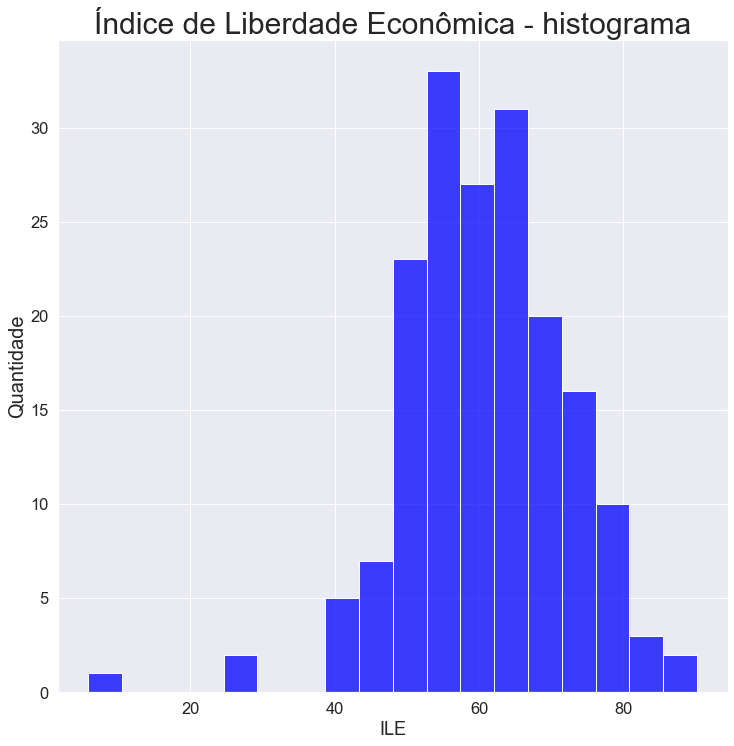

In [19]:
# Histograma do índice de liberdade econômica
sns.set_palette(sns.color_palette())
ax = sns.histplot(liberdade.query('ano == 2019'), x='ILE', color="blue")
ax.set_title('Índice de Liberdade Econômica - histograma', fontsize=30)
ax.set_ylabel('Quantidade', fontsize=20)

In [20]:
# Liberdade Econômica Média - por ano
liberdade_media = liberdade.groupby('ano')['ILE'].mean()

In [21]:
print(type(liberdade_media))
print(liberdade_media)

<class 'pandas.core.series.Series'>
ano
2010    59.365364
2011    59.707264
2012    59.492180
2013    59.649719
2014    60.279213
2015    60.443260
2016    60.684269
2017    60.902222
2018    61.074444
2019    60.768333
Name: ILE, dtype: float32


In [22]:
# Liberdade Econômica do Brasil - por ano
liberdade_brasil = liberdade.query('pais == "Brazil"')['ILE'].droplevel('pais')
print(liberdade_brasil)

ano
2019    51.900002
2018    51.400002
2017    52.900002
2016    56.500000
2015    56.599998
2014    56.900002
2013    57.700001
2012    57.900002
2011    56.299999
2010    55.599998
Name: ILE, dtype: float32


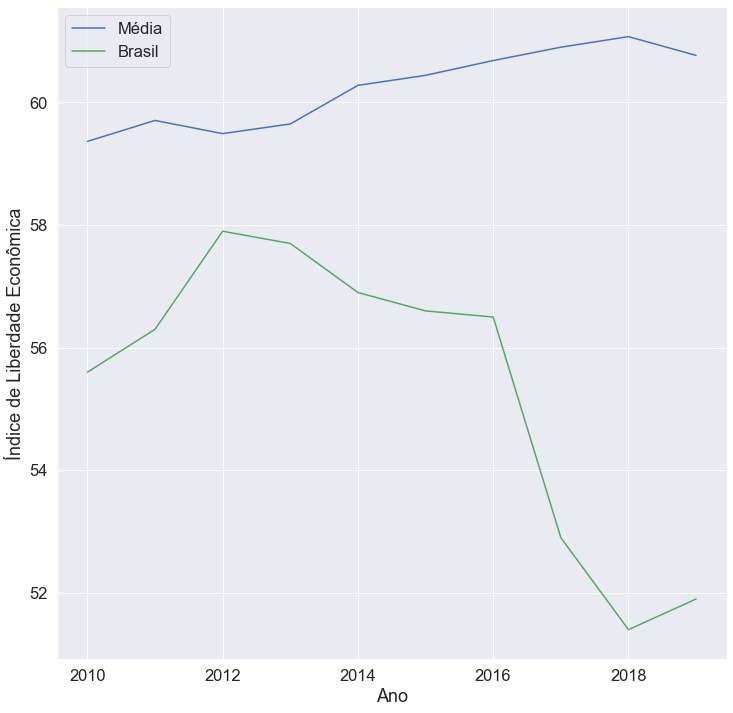

In [23]:
fig, ax = plt.subplots()
ax.plot(liberdade_media, label='Média', color='b')
ax.plot(liberdade_brasil, label='Brasil', color='g')
ax.set_ylabel('Índice de Liberdade Econômica')
ax.set_xlabel('Ano')
ax.legend()

# Ranking

In [24]:
# Selecionando os 15 melhores e piores países do ranking
liberdade_melhores = liberdade.query('ano == 2019').sort_values(by='ILE', ascending=False).head(15).reset_index()
liberdade_piores = liberdade.query('ano == 2019').sort_values(by='ILE', ascending=False).tail(15).reset_index()

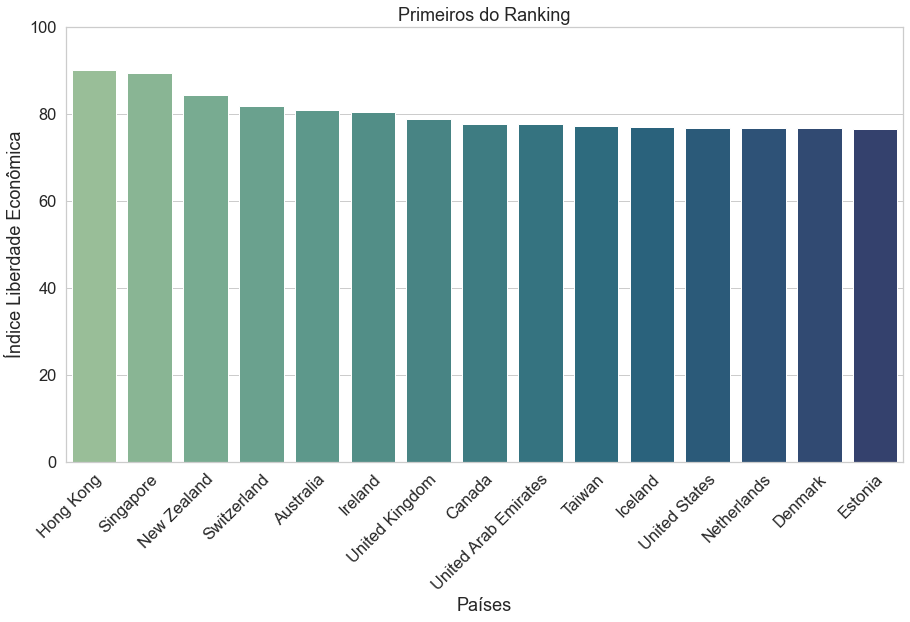

In [25]:
# Gráfico em barras com os melhores países do ranking
sns.set(style="whitegrid", font_scale = 1.5)
plt.figure(figsize = (15,8))
ax = sns.barplot(x="pais", y="ILE", data=liberdade_melhores, orient = "v", palette=sns.color_palette("crest", 15))
ax.set_ylim(0, 100)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45, rotation_mode='anchor', ha='right')
ax.set(xlabel='Países', ylabel='Índice Liberdade Econômica', title='Primeiros do Ranking')
plt.show()

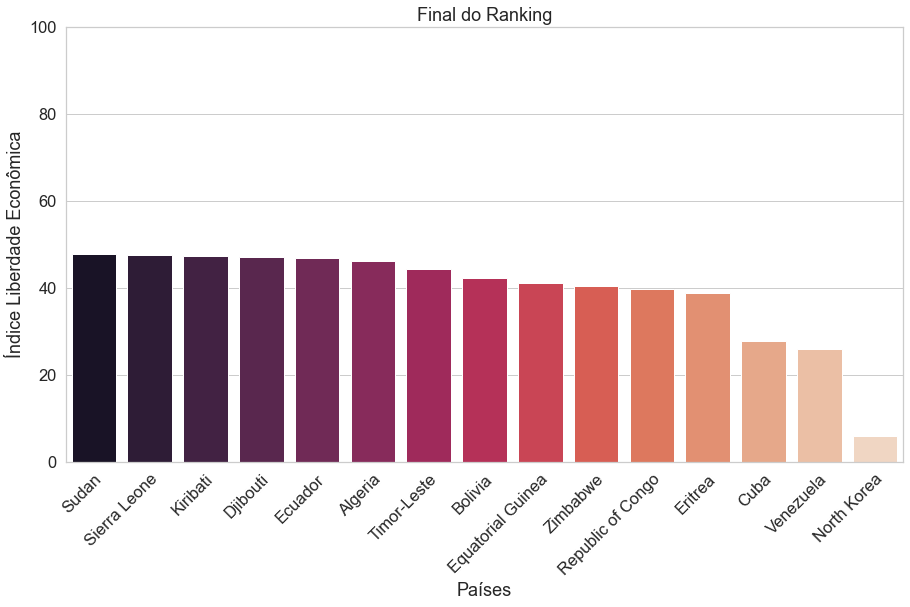

In [26]:
# Gráfico em barras com os piores países do ranking
plt.figure(figsize = (15,8))
ax = sns.barplot(x="pais", y="ILE", data=liberdade_piores, orient = "v", palette=sns.color_palette("rocket", 15))
ax.set_ylim(0, 100)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45, rotation_mode='anchor', ha='right')
ax.set(xlabel='Países', ylabel='Índice Liberdade Econômica', title='Final do Ranking')
plt.show()

In [27]:
liberdade

,,ILE,propriedade,governo_integridade,judiciario,tributos,governo_gastos,saude_fiscal,negocios,trabalho,monetaria,comercial,investimentos,financeira
pais,ano,,,,,,,,,,,,,
Afghanistan,2019,51.500000,19.600000,25.200001,29.600000,91.699997,80.300003,99.300003,49.200001,60.400002,76.699997,66.000000,10.0,10.0
Albania,2019,66.500000,54.799999,40.400002,30.600000,86.300003,73.900002,80.599998,69.300003,52.700001,81.500000,87.800003,70.0,70.0
Algeria,2019,46.200001,31.600000,28.900000,36.200001,76.400002,48.700001,18.700001,61.599998,49.900002,74.900002,67.400002,30.0,30.0
Angola,2019,50.599998,35.900002,20.500000,26.600000,83.900002,80.699997,58.200001,55.700001,58.799999,55.400002,61.200001,30.0,40.0
Argentina,2019,52.200001,47.799999,33.500000,44.500000,69.300003,49.500000,33.000000,56.400002,46.900002,60.200001,70.000000,55.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,2010,37.099998,0.000000,19.000000,37.119999,74.000000,61.799999,37.119999,50.299999,36.200001,47.700001,57.200001,5.0,20.0
Vietnam,2010,49.799999,15.000000,27.000000,49.759998,76.099998,73.400002,49.759998,60.700001,68.400002,58.099998,68.900002,20.0,30.0
Yemen,2010,54.400002,30.000000,23.000000,54.349998,83.199997,51.299999,54.349998,74.400002,65.400002,65.099998,76.099998,45.0,30.0


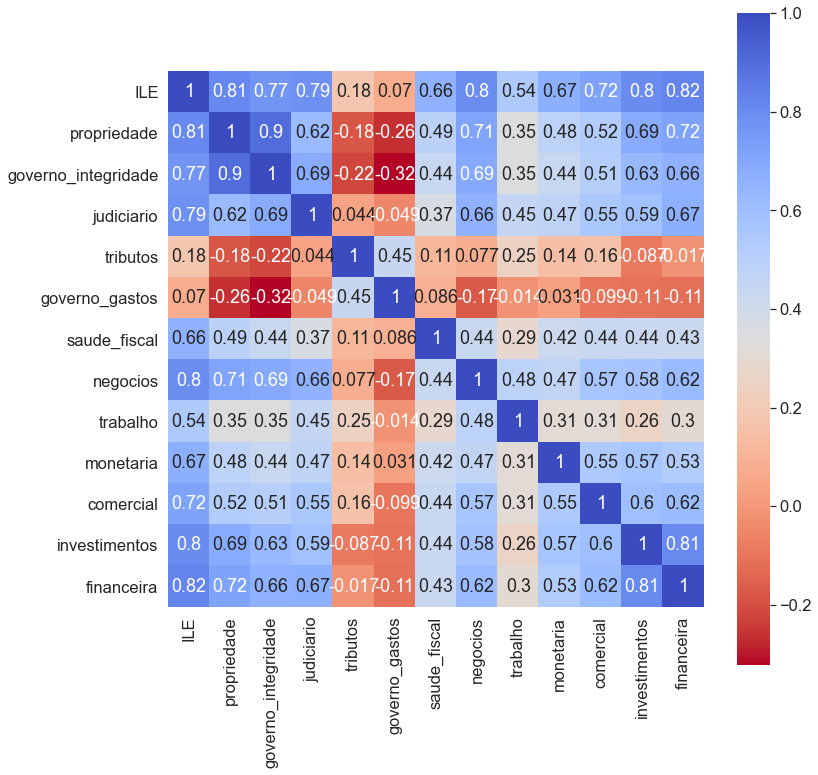

In [28]:
#matriz de correlação (mapa de calor)
mapa = sns.heatmap(liberdade.corr(),  square=True, annot=True, cmap='coolwarm_r')

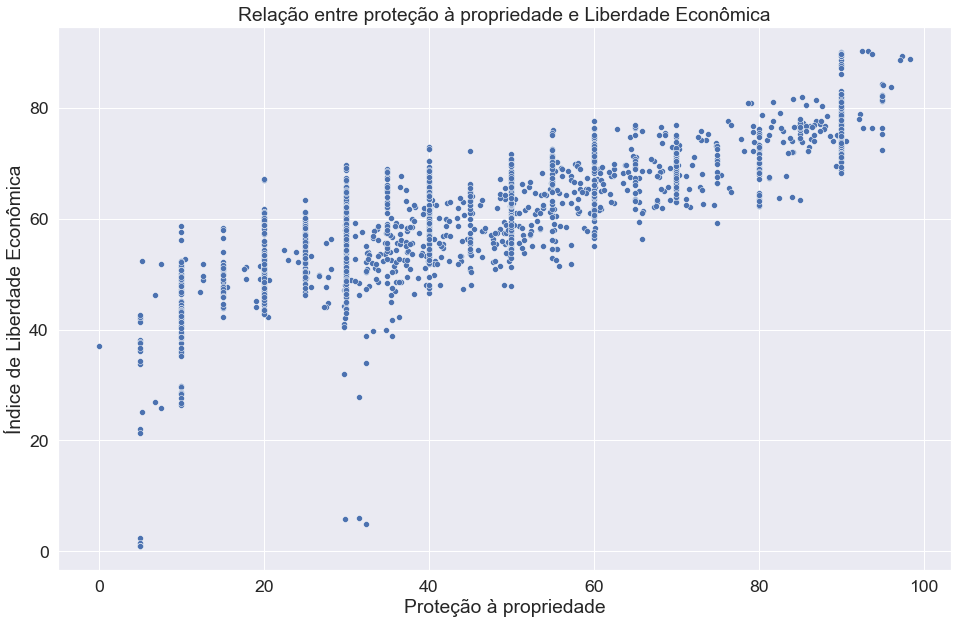

In [29]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
sns.set(font_scale=1.6)

sns.scatterplot(x='propriedade', y='ILE', data=liberdade)
plt.xlabel('Proteção à propriedade')
plt.ylabel('Índice de Liberdade Econômica')
plt.title('Relação entre proteção à propriedade e Liberdade Econômica')
plt.show()

In [30]:
liberdade = liberdade.reset_index()
liberdade.head()

,pais,ano,ILE,propriedade,governo_integridade,judiciario,tributos,governo_gastos,saude_fiscal,negocios,trabalho,monetaria,comercial,investimentos,financeira
0,Afghanistan,2019,51.500000,19.600000,25.200001,29.600000,91.699997,80.300003,99.300003,49.200001,60.400002,76.699997,66.000000,10.0,10.0
1,Albania,2019,66.500000,54.799999,40.400002,30.600000,86.300003,73.900002,80.599998,69.300003,52.700001,81.500000,87.800003,70.0,70.0
2,Algeria,2019,46.200001,31.600000,28.900000,36.200001,76.400002,48.700001,18.700001,61.599998,49.900002,74.900002,67.400002,30.0,30.0
3,Angola,2019,50.599998,35.900002,20.500000,26.600000,83.900002,80.699997,58.200001,55.700001,58.799999,55.400002,61.200001,30.0,40.0
4,Argentina,2019,52.200001,47.799999,33.500000,44.500000,69.300003,49.500000,33.000000,56.400002,46.900002,60.200001,70.000000,55.0,60.0


<br><br><br><br><br>
# Índice de Desenvolvimento Humano

In [31]:
# todos os países
url_consulta_idh = 'http://ec2-54-174-131-205.compute-1.amazonaws.com/API/HDRO_API.php/indicator_id=137506,69206,69706,103006,195706/year=2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021/structure=ciy'

# Booleano que define se já existe arquivo json com consulta realizada anteriormente
arquivo_idh_existe = exists(diretorio+idh_arquivo)

if arquivo_idh_existe:
    print('O arquivo com dados de IDH já existe!')
else:
    print('O arquivo com dados de IDH não foi encontrado. Realizando consulta..')
    response = urllib.request.urlopen(url_consulta_idh)
    data = json.loads(response.read())
    idh_web_json = open(diretorio+idh_arquivo,"w")
    idh_web_json.write(json.dumps(data))
    idh_web_json.close()
    print('Consulta realizada!')   
    
# Carregando o arquivo local
idh_byte = open(diretorio+idh_arquivo)
idh_json = json.load(idh_byte)

O arquivo com dados de IDH já existe!


In [32]:
# Dicionário indicador código VS descrição
idh_json['indicator_name']

{'69206': 'Life expectancy at birth (years)',
 '69706': 'Expected years of schooling (years)',
 '103006': 'Mean years of schooling (years)',
 '137506': 'Human Development Index (HDI)',
 '195706': 'Gross national income (GNI) per capita (constant 2017 PPP$)'}

In [33]:
# Carregando a tabela do arquivo
idh = pd.concat({k: pd.DataFrame.from_dict(v, 'index') for k, v in idh_json['indicator_value'].items()}, axis=0)
idh.head()

2010      2011      2012      2013      2014      2015  \
AFG 69206     61.028    61.553    62.054    62.525    62.966    63.377   
    69706      9.532     9.478     9.973    10.172    10.262    10.235   
    103006     3.230     3.310     3.390     3.470     3.550     3.630   
    137506     0.472     0.477     0.489     0.496     0.500     0.500   
    195706  1917.395  2013.614  2164.641  2229.907  2214.414  2128.162   

                2016      2017      2018      2019  
AFG 69206     63.763    64.130    64.486    64.830  
    69706     10.262    10.139    10.139    10.176  
    103006     3.630     3.780     3.930     3.930  
    137506     0.502     0.506     0.509     0.511  
    195706  2134.866  2229.658  2217.176  2229.362

In [34]:
# Resetando o index
idh.reset_index(inplace=True)
idh.rename(columns={"level_0": "pais_sigla", "level_1": "indicador_codigo"}, inplace=True)
idh.head()

,pais_sigla,indicador_codigo,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,AFG,69206,61.028,61.553,62.054,62.525,62.966,63.377,63.763,64.130,64.486,64.830
1,AFG,69706,9.532,9.478,9.973,10.172,10.262,10.235,10.262,10.139,10.139,10.176
2,AFG,103006,3.230,3.310,3.390,3.470,3.550,3.630,3.630,3.780,3.930,3.930
3,AFG,137506,0.472,0.477,0.489,0.496,0.500,0.500,0.502,0.506,0.509,0.511
4,AFG,195706,1917.395,2013.614,2164.641,2229.907,2214.414,2128.162,2134.866,2229.658,2217.176,2229.362


In [35]:
# Transformando colunas de anos em uma única coluna
idh = idh.melt(id_vars=["pais_sigla", "indicador_codigo"], 
        var_name="ano", 
        value_name="valor")
idh.head()

,pais_sigla,indicador_codigo,ano,valor
0,AFG,69206,2010,61.028
1,AFG,69706,2010,9.532
2,AFG,103006,2010,3.230
3,AFG,137506,2010,0.472
4,AFG,195706,2010,1917.395


In [36]:
# Transformando indicadores em colunas
idh = idh.pivot(index={'ano',"pais_sigla"}, columns="indicador_codigo", values="valor")
idh.head()

indicador_codigo  103006  137506     195706   69206   69706
ano  pais_sigla                                            
2010 AFG           3.230   0.472   1917.395  61.028   9.532
     AGO           4.726   0.517   6913.161  55.350   8.646
     ALB           9.292   0.745  10774.722  76.562  13.000
     AND          10.364   0.837  49261.522  80.818  11.672
     ARE           9.883   0.820  54911.287  76.332  12.208

In [37]:
# Renomeando as colunas com as descrições (conforme fonte)
idh.rename(columns=idh_json['indicator_name'], inplace=True)
idh.head()

indicador_codigo  Mean years of schooling (years)  \
ano  pais_sigla                                     
2010 AFG                                    3.230   
     AGO                                    4.726   
     ALB                                    9.292   
     AND                                   10.364   
     ARE                                    9.883   

indicador_codigo  Human Development Index (HDI)  \
ano  pais_sigla                                   
2010 AFG                                  0.472   
     AGO                                  0.517   
     ALB                                  0.745   
     AND                                  0.837   
     ARE                                  0.820   

indicador_codigo  Gross national income (GNI) per capita (constant 2017 PPP$)  \
ano  pais_sigla                                                                 
2010 AFG                                                   1917.395             
     AGO                                                   6913.161             
     ALB                                                  10774.722             
     AND                                                  49261.522             
     ARE                                                  54911.287             

indicador_codigo  Life expectancy at birth (years)  \
ano  pais_sigla                                      
2010 AFG                                    61.028   
     AGO                                    55.350   
     ALB                                    76.562   
     AND                                    80.818   
     ARE                                    76.332   

indicador_codigo  Expected years of schooling (years)  
ano  pais_sigla                                        
2010 AFG                                        9.532  
     AGO                                        8.646  
     ALB                                       13.000  
     AND                                       11.672  
     ARE                                       12.208

In [38]:
# Obtendo nome dos países por código
siglas_paises = pd.DataFrame.from_dict(idh_json['country_name'], orient='index', columns=['pais']).reset_index()
siglas_paises.rename(columns={'index':'pais_sigla'}, inplace=True)
siglas_paises.head()

,pais_sigla,pais
0,AFG,Afghanistan
1,AGO,Angola
2,ALB,Albania
3,AND,Andorra
4,ARE,United Arab Emirates


In [39]:
idh = idh.reset_index().rename_axis(None, axis=1)
idh.head()

,ano,pais_sigla,Mean years of schooling (years),Human Development Index (HDI),Gross national income (GNI) per capita (constant 2017 PPP$),Life expectancy at birth (years),Expected years of schooling (years)
0,2010,AFG,3.230,0.472,1917.395,61.028,9.532
1,2010,AGO,4.726,0.517,6913.161,55.350,8.646
2,2010,ALB,9.292,0.745,10774.722,76.562,13.000
3,2010,AND,10.364,0.837,49261.522,80.818,11.672
4,2010,ARE,9.883,0.820,54911.287,76.332,12.208


In [40]:
idh = idh.merge(siglas_paises, how='left', left_on='pais_sigla', right_on='pais_sigla')
idh.head()

,ano,pais_sigla,Mean years of schooling (years),Human Development Index (HDI),Gross national income (GNI) per capita (constant 2017 PPP$),Life expectancy at birth (years),Expected years of schooling (years),pais
0,2010,AFG,3.230,0.472,1917.395,61.028,9.532,Afghanistan
1,2010,AGO,4.726,0.517,6913.161,55.350,8.646,Angola
2,2010,ALB,9.292,0.745,10774.722,76.562,13.000,Albania
3,2010,AND,10.364,0.837,49261.522,80.818,11.672,Andorra
4,2010,ARE,9.883,0.820,54911.287,76.332,12.208,United Arab Emirates


In [41]:
idh.rename(columns={
                     "Human Development Index (HDI)": "IDH",
                     "Life expectancy at birth (years)": "expectativa_vida",
                     "Expected years of schooling (years)": "anos_escolaridade_prog",
                     "Mean years of schooling (years)": "anos_escolaridade_realiz",
                     "Gross national income (GNI) per capita (constant 2017 PPP$)": "pib_per_capita"
                    }, inplace=True)
idh.head()

,ano,pais_sigla,anos_escolaridade_realiz,IDH,pib_per_capita,expectativa_vida,anos_escolaridade_prog,pais
0,2010,AFG,3.230,0.472,1917.395,61.028,9.532,Afghanistan
1,2010,AGO,4.726,0.517,6913.161,55.350,8.646,Angola
2,2010,ALB,9.292,0.745,10774.722,76.562,13.000,Albania
3,2010,AND,10.364,0.837,49261.522,80.818,11.672,Andorra
4,2010,ARE,9.883,0.820,54911.287,76.332,12.208,United Arab Emirates


In [42]:
idh = idh[['pais','ano','IDH','expectativa_vida','anos_escolaridade_prog','anos_escolaridade_realiz','pib_per_capita']]
idh.head()

,pais,ano,IDH,expectativa_vida,anos_escolaridade_prog,anos_escolaridade_realiz,pib_per_capita
0,Afghanistan,2010,0.472,61.028,9.532,3.230,1917.395
1,Angola,2010,0.517,55.350,8.646,4.726,6913.161
2,Albania,2010,0.745,76.562,13.000,9.292,10774.722
3,Andorra,2010,0.837,80.818,11.672,10.364,49261.522
4,United Arab Emirates,2010,0.820,76.332,12.208,9.883,54911.287


In [43]:
# A tabela possui 1940 registros em 7 colunas
idh.shape

(1940, 7)

In [44]:
# Verificando valores nulos e tipos inferidos
idh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1940 entries, 0 to 1939
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pais                      1940 non-null   object 
 1   ano                       1940 non-null   object 
 2   IDH                       1883 non-null   float64
 3   expectativa_vida          1910 non-null   float64
 4   anos_escolaridade_prog    1914 non-null   float64
 5   anos_escolaridade_realiz  1889 non-null   float64
 6   pib_per_capita            1910 non-null   float64
dtypes: float64(5), object(2)
memory usage: 121.2+ KB


In [45]:
idh.dropna(axis=0, how='any', inplace=True)
idh['ano'] = idh['ano'].astype(str).astype(int)
idh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1883 entries, 0 to 1939
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pais                      1883 non-null   object 
 1   ano                       1883 non-null   int32  
 2   IDH                       1883 non-null   float64
 3   expectativa_vida          1883 non-null   float64
 4   anos_escolaridade_prog    1883 non-null   float64
 5   anos_escolaridade_realiz  1883 non-null   float64
 6   pib_per_capita            1883 non-null   float64
dtypes: float64(5), int32(1), object(1)
memory usage: 110.3+ KB


In [46]:
# O Índice IDH varia de 0 a 1
# sendo o mímino encontrado 0,152 e o maior 0,957
# IDH médio de 0,70697 com desvio padrão de 0,152524

# Expectativa de vida mínima 45,1 e máxima 84,86

# pib per capita mínimo 753 e máximo 131.031
# ppc (pib per capita) médio de 19.053 com desvio padrão 19.901
# desvio padrão alto
idh.describe()

,ano,IDH,expectativa_vida,anos_escolaridade_prog,anos_escolaridade_realiz,pib_per_capita
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,2014.505576,0.706971,71.508235,13.050589,8.392893,19053.283086
std,2.874333,0.152524,8.027438,2.937774,3.121567,19901.908984
min,2010.000000,0.331000,45.100000,4.727000,1.373000,753.909000
25%,2012.000000,0.581000,66.288000,11.201000,5.926500,4271.252000
50%,2015.000000,0.733000,73.110000,13.036000,8.667000,11886.925000
75%,2017.000000,0.822000,77.126000,15.051000,11.071000,26555.337000
max,2019.000000,0.957000,84.860000,23.282000,14.152000,131031.590000


In [47]:
# Removendo espaços no início e nos finais dos nomes dos países
idh['pais'] = idh['pais'].str.strip()
liberdade['pais'] = liberdade['pais'].str.strip()

#foi utilizada a biblioteca pycountry para realizar a junção, mas não houve sucesso

#Corrigindo diferentes grafias
idh['pais'].replace('Congo (Democratic Republic of the)', 'Democratic Republic of Congo', inplace=True)
idh['pais'].replace('South Sudan', 'Sudan', inplace=True)
idh['pais'].replace('Gambia', 'The Gambia', inplace=True)
idh['pais'].replace('Tanzania (United Republic of)', 'Tanzania', inplace=True)
idh['pais'].replace('Congo', 'Republic of Congo', inplace=True)
idh['pais'].replace('Syrian Arab Republic', 'Syria', inplace=True)
idh['pais'].replace('Micronesia (Federated States of)', 'Micronesia', inplace=True)
idh['pais'].replace('Kyrgyzstan', 'Kyrgyz Republic', inplace=True)
idh['pais'].replace('Venezuela (Bolivarian Republic of)', 'Venezuela', inplace=True)
idh['pais'].replace('Lao People\'s Democratic Republic', 'Laos', inplace=True)
idh['pais'].replace('Viet Nam', 'Vietnam', inplace=True)
idh['pais'].replace('Eswatini (Kingdom of)', 'Eswatini', inplace=True)
idh['pais'].replace('Bolivia (Plurinational State of)', 'Bolivia', inplace=True)
idh['pais'].replace('Iran (Islamic Republic of)', 'Iran', inplace=True)
idh['pais'].replace('Moldova (Republic of)', 'Moldova', inplace=True)
idh['pais'].replace('Russian Federation', 'Russia', inplace=True)
idh['pais'].replace('Slovakia', 'Slovak Republic', inplace=True)
idh['pais'].replace('Bahamas', 'The Bahamas', inplace=True)
idh['pais'].replace('Czechia', 'Czech Republic', inplace=True)
idh['pais'].replace('Korea (Republic of)', 'South Korea', inplace=True)
idh['pais'].replace('Hong Kong China (SAR)', 'Hong Kong', inplace=True)

# Países com IDH que não estão na tabela com dados de Liberdade Econômica
# 1. Sao Tome and Principe
# 2. Myanmar
# 3. Marshall Islands
# 4. Palestine State of
# 5. Grenada
# 6. Palau
# 7. Antigua and Barbuda
# 8. Saint Kitts and Nevis
# 9. Andorra

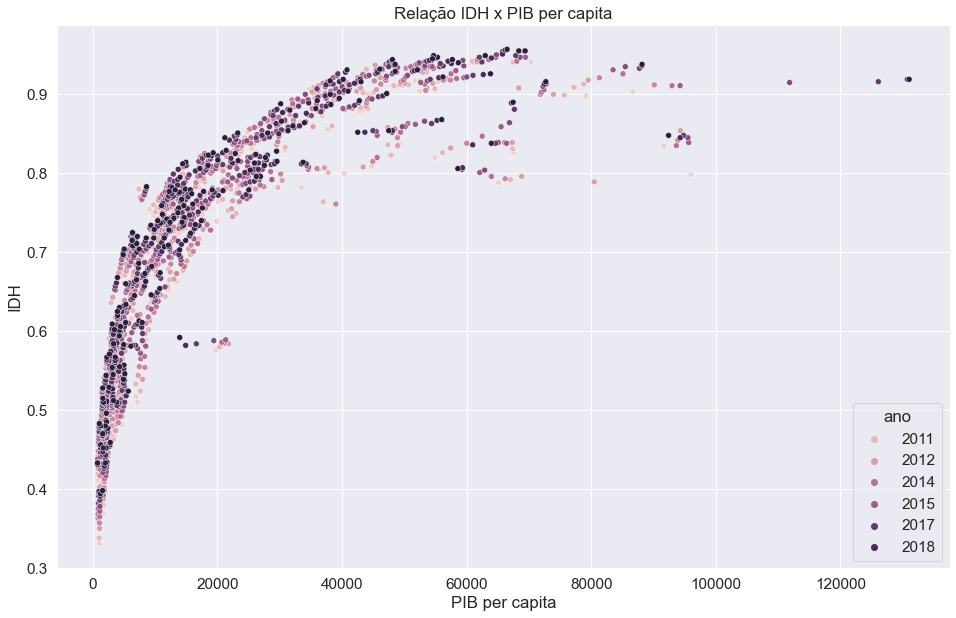

In [48]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
sns.set(font_scale=1.4)

ax = sns.scatterplot(x='pib_per_capita', y='IDH', data=idh, hue='ano')
ax.set(xlabel = 'PIB per capita', ylabel = 'IDH', title='Relação IDH x PIB per capita')
plt.show()

In [49]:
idh[(idh['IDH'] < 0.6) & (idh['pib_per_capita'] > 10000)]

,pais,ano,IDH,expectativa_vida,anos_escolaridade_prog,anos_escolaridade_realiz,pib_per_capita
67,Equatorial Guinea,2010,0.576,55.622,9.200,5.469,19742.222
261,Equatorial Guinea,2011,0.580,55.945,9.200,5.480,20366.366
455,Equatorial Guinea,2012,0.584,56.288,9.200,5.492,21808.484
649,Equatorial Guinea,2013,0.585,56.642,9.200,5.504,21134.311
843,Equatorial Guinea,2014,0.586,57.001,9.200,5.516,20703.949
1037,Equatorial Guinea,2015,0.589,57.359,9.200,5.527,21324.319
1231,Equatorial Guinea,2016,0.588,57.713,9.200,5.539,19423.152
1425,Equatorial Guinea,2017,0.584,58.061,9.200,5.551,16604.359
1619,Equatorial Guinea,2018,0.582,58.402,9.200,5.551,14896.766
1813,Equatorial Guinea,2019,0.592,58.740,9.735,5.911,13944.132


[Text(0, 0.5, 'nr. Países'), Text(0.5, 0, 'PIB per capita')]

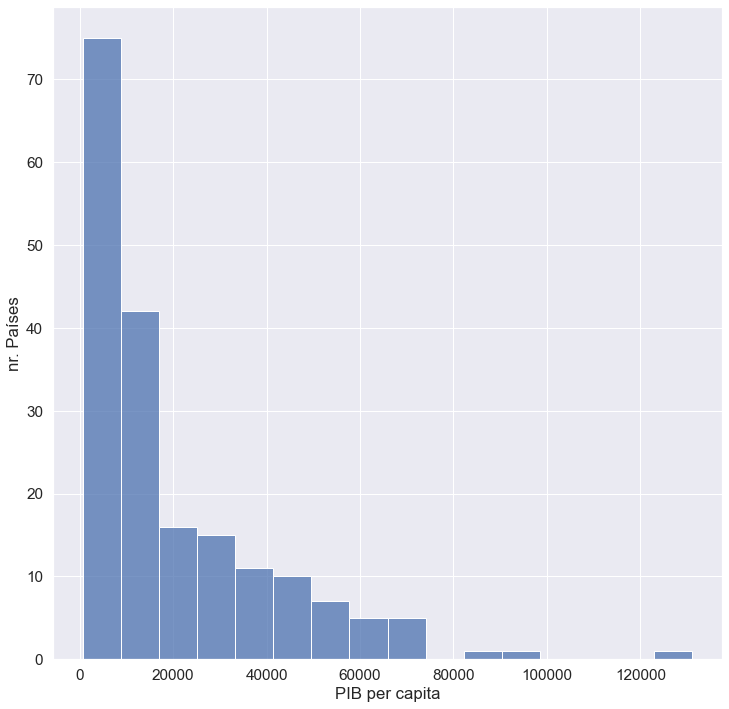

In [50]:
ax = sns.histplot(idh[idh.ano == 2019]['pib_per_capita'])
ax.set(ylabel = 'nr. Países', xlabel = 'PIB per capita')

[Text(0, 0.5, 'Expectativa de Vida'), Text(0.5, 0, 'PIB per capita')]

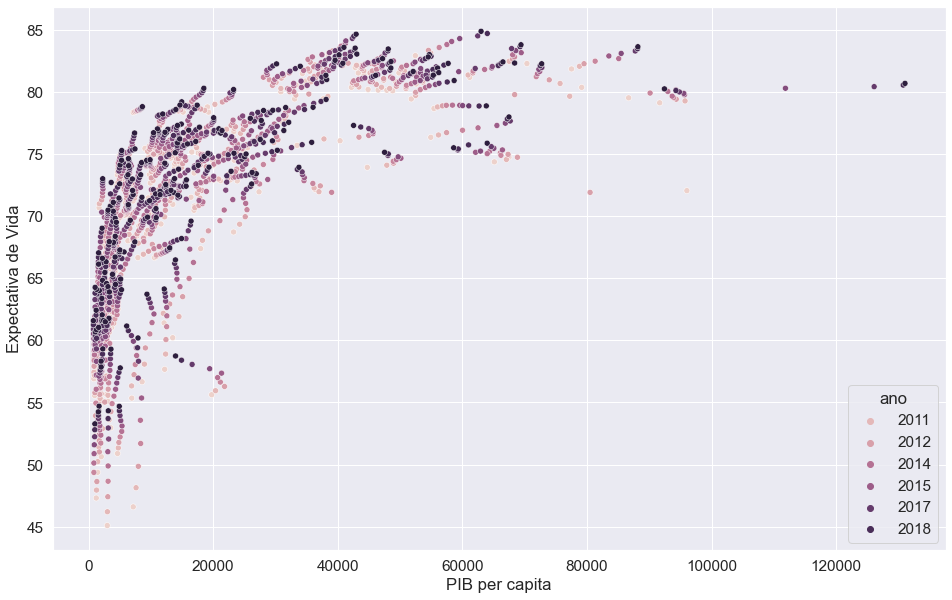

In [51]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
sns.set(font_scale=1.4)

ax = sns.scatterplot(x='pib_per_capita', y='expectativa_vida', data=idh, hue='ano')
ax.set(ylabel = 'Expectativa de Vida', xlabel='PIB per capita')

[Text(22.278125000000017, 0.5, 'Expectativa de Vida'),
 Text(0.5, 22.278124999999996, 'IDH')]

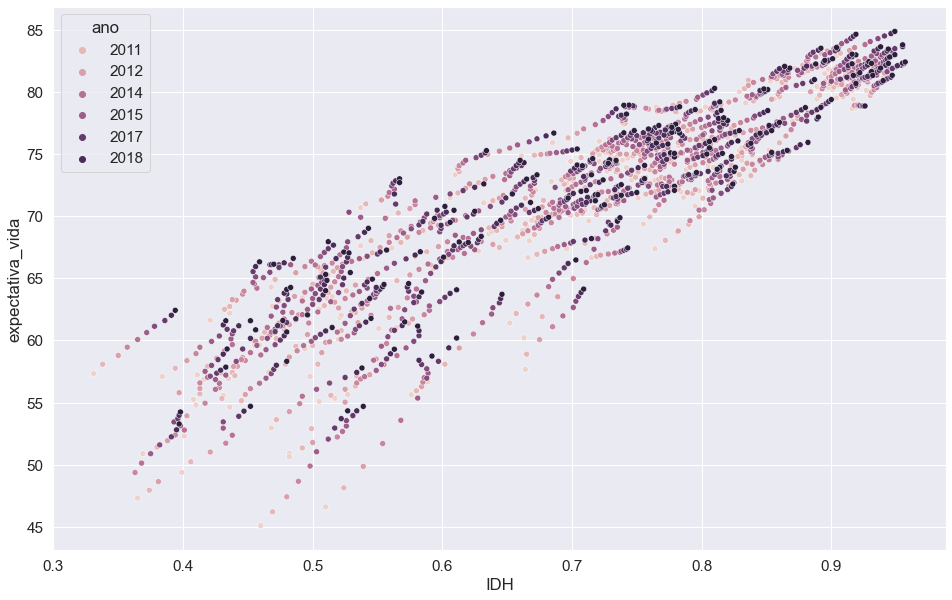

In [52]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
sns.set(font_scale=1.4)

sns.scatterplot(x='IDH', y='expectativa_vida', data=idh, hue='ano')
ax.set(ylabel = 'Expectativa de Vida', xlabel='IDH')

<AxesSubplot:xlabel='ano'>

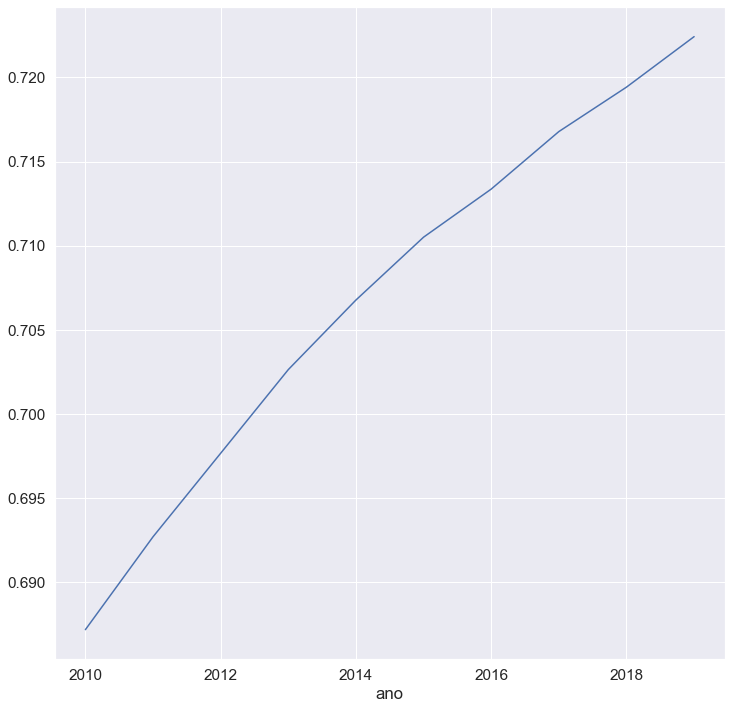

In [53]:
idh_media_anos = idh.groupby('ano')['IDH'].mean()
idh_media_anos.plot()

# Juntando as tabelas - Liberdade Econômica VS IDH

In [54]:
data = idh.merge(liberdade, on=['pais','ano'], how='inner')

In [55]:
data.head()

,pais,ano,IDH,expectativa_vida,anos_escolaridade_prog,anos_escolaridade_realiz,pib_per_capita,ILE,propriedade,governo_integridade,judiciario,tributos,governo_gastos,saude_fiscal,negocios,trabalho,monetaria,comercial,investimentos,financeira
0,Angola,2010,0.517,55.350,8.646,4.726,6913.161,48.400002,20.0,19.0,48.349998,85.099998,62.799999,48.349998,43.400002,45.200001,62.599998,70.400002,35.0,40.0
1,Albania,2010,0.745,76.562,13.000,9.292,10774.722,66.000000,35.0,34.0,66.040001,92.599998,74.199997,66.040001,68.000000,52.099998,78.699997,85.800003,70.0,70.0
2,United Arab Emirates,2010,0.820,76.332,12.208,9.883,54911.287,67.300003,50.0,59.0,67.309998,99.900002,80.900002,67.309998,67.400002,79.300003,68.800003,82.800003,35.0,50.0
3,Argentina,2010,0.829,75.278,17.062,10.334,22727.026,51.200001,20.0,29.0,51.200001,69.500000,75.599998,51.200001,62.099998,50.099998,61.200001,69.500000,45.0,30.0
4,Armenia,2010,0.747,73.331,13.087,11.117,9752.830,69.199997,30.0,29.0,69.160004,89.300003,90.900002,69.160004,83.400002,70.599998,72.900002,80.500000,75.0,70.0


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1717 entries, 0 to 1716
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pais                      1717 non-null   object 
 1   ano                       1717 non-null   int32  
 2   IDH                       1717 non-null   float64
 3   expectativa_vida          1717 non-null   float64
 4   anos_escolaridade_prog    1717 non-null   float64
 5   anos_escolaridade_realiz  1717 non-null   float64
 6   pib_per_capita            1717 non-null   float64
 7   ILE                       1717 non-null   float32
 8   propriedade               1717 non-null   float32
 9   governo_integridade       1717 non-null   float32
 10  judiciario                1717 non-null   float32
 11  tributos                  1717 non-null   float32
 12  governo_gastos            1717 non-null   float32
 13  saude_fiscal              1717 non-null   float32
 14  negocios

<AxesSubplot:>

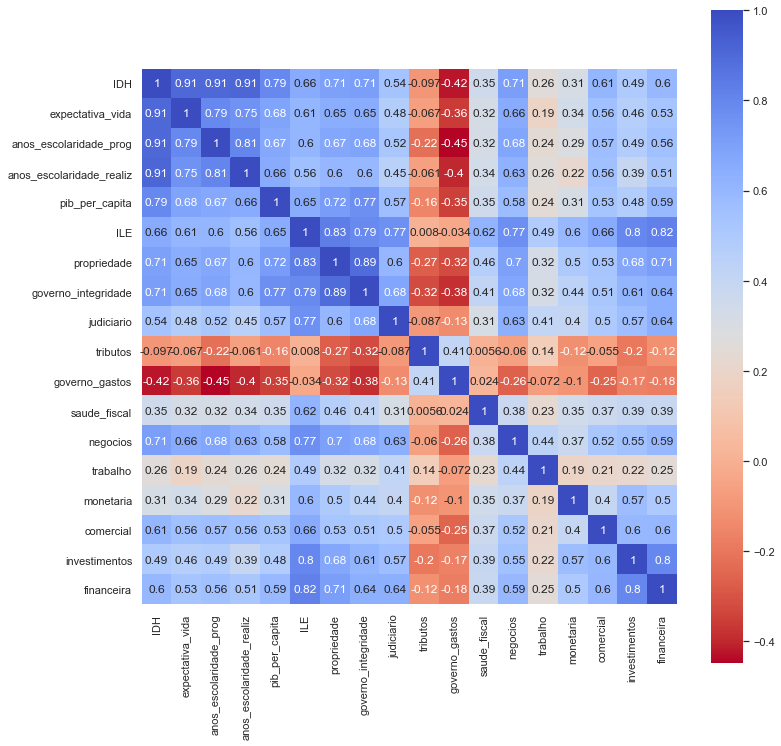

In [57]:
#matriz de correlação
data_numeros = data.drop(columns='ano')._get_numeric_data()
data_correlacao = data_numeros.corr()

#mapa calor correlação
sns.set(font_scale=1)

plt.figure(figsize=(12,12))
sns.heatmap(data_correlacao, square=True, annot=True, cmap='coolwarm_r')

<AxesSubplot:xlabel='ILE', ylabel='IDH'>

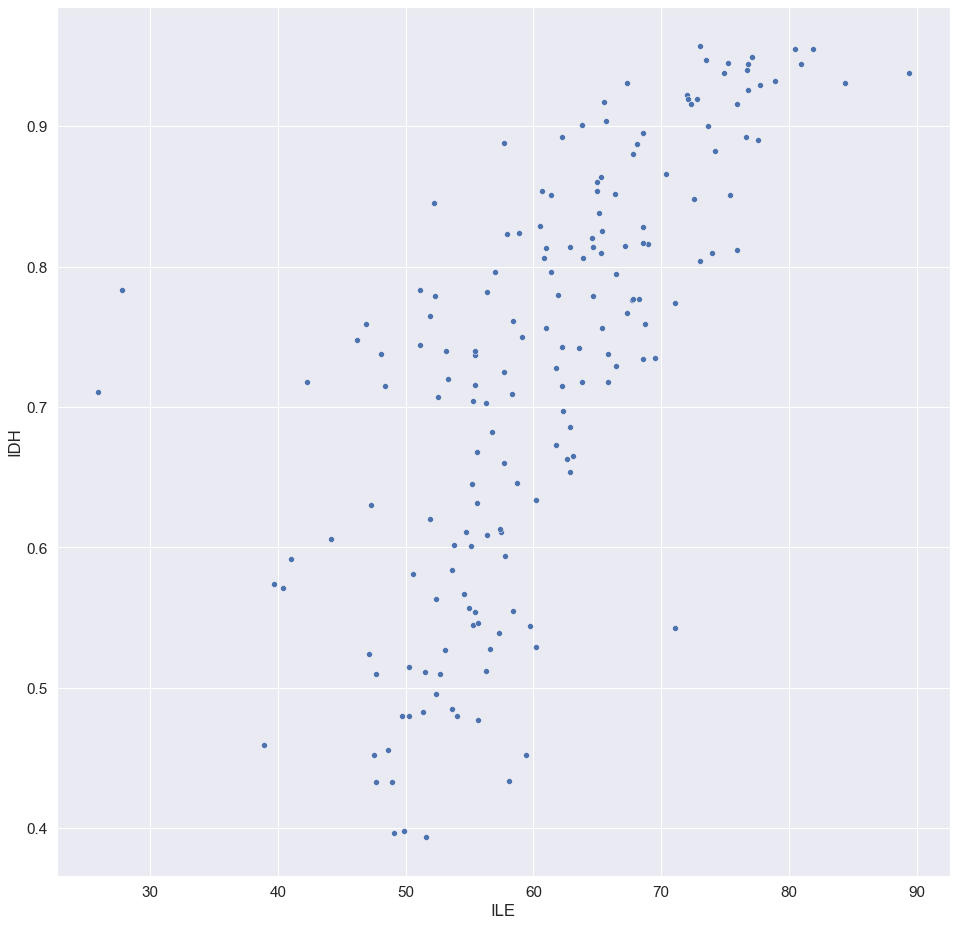

In [58]:
fig = plt.gcf()
fig.set_size_inches(16, 16)
sns.set(font_scale=1.4)

sns.scatterplot(x='ILE', y='IDH', data=data[data.ano == 2019])

<AxesSubplot:xlabel='ILE', ylabel='IDH'>

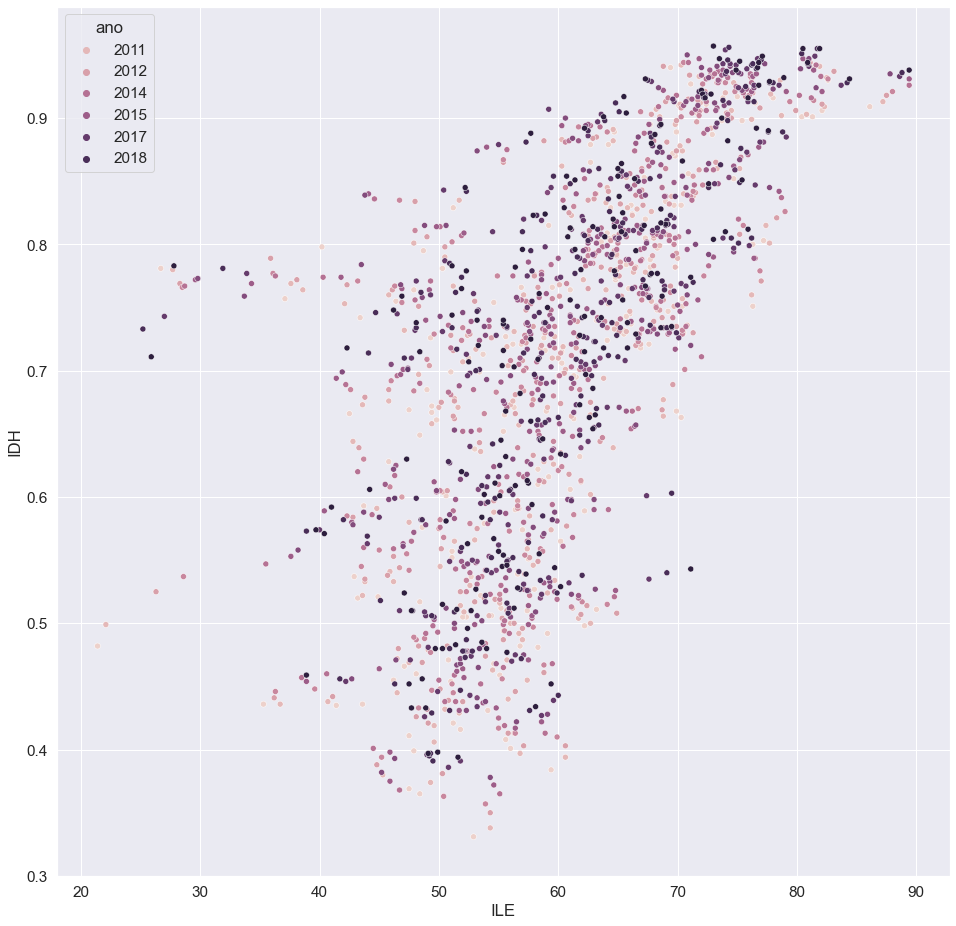

In [59]:
fig = plt.gcf()
fig.set_size_inches(16, 16)
sns.set(font_scale=1.4)

sns.scatterplot(x='ILE', y='IDH', data=data, hue='ano')

# Machine Learning

In [60]:
data_treino, data_validacao = train_test_split(data, test_size=0.2, random_state=123)

print('Tamanho base: ', data.shape[0])
print('Tamanho base treino: ', data_treino.shape[0])
print('Tamanho base validação: ', data_validacao.shape[0])

Tamanho base:  1717
Tamanho base treino:  1373
Tamanho base validação:  344


In [ ]:
features_ignorar = ['pais',
                    'ano',
                    'expectativa_vida',
                    'anos_escolaridade_prog',
                    'anos_escolaridade_realiz',
                    'pib_per_capita',
                    'ILE']

regressao_idh = setup(data=data_treino,
                      test_data=data_validacao,
                      target = 'IDH',
                      ignore_features=features_ignorar,
                      session_id=123)

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:11:41
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
IDH,Label
propriedade,Numeric
governo_integridade,Numeric
judiciario,Numeric
tributos,Numeric
governo_gastos,Numeric
saude_fiscal,Numeric
negocios,Numeric
trabalho,Numeric
monetaria,Numeric


In [ ]:
compare_models(turbo=False)

In [ ]:
extra_trees = create_model('et')

In [ ]:
extra_trees

In [ ]:
extra_trees_tuned = tune_model(extra_trees)

In [ ]:
extra_trees_tuned

In [ ]:
plot_model(extra_trees)

In [ ]:
teste_modelo_data_treino = predict_model(extra_trees, data=data_treino)
teste_modelo_data_treino[['IDH','Label']].head(20)

In [ ]:
sns.scatterplot(data=teste_modelo_data_treino, x='IDH',y='Label')

In [ ]:
r2_score(teste_modelo_data_treino['IDH'], teste_modelo_data_treino['Label'])

In [ ]:
plot_model(extra_trees_tuned)

In [ ]:
plot_model(extra_trees, plot='error')

In [ ]:
interpret_model(extra_trees)

In [ ]:
plot_model(extra_trees, plot = 'feature')

# Liberdade Econômica VS PIB per capita

In [ ]:
features_ignorar = ['pais',
                    'ano',
                    'expectativa_vida',
                    'anos_escolaridade_prog',
                    'anos_escolaridade_realiz',                    
                    'IDH',
                    'ILE']

pib_setup = setup(data=data_treino,
                  test_data=data_validacao,
                  target = 'pib_per_capita',
                  ignore_features=features_ignorar, session_id=123)

In [ ]:
compare_models()

In [ ]:
pib_et_model = create_model('et')

In [ ]:
pib_et_model_tuned = tune_model(pib_et_model)

In [ ]:
plot_model(pib_et_model, plot = 'feature')

In [ ]:
plot_model(pib_et_model)

In [ ]:
plot_model(pib_et_model, plot = 'error')

In [ ]:
interpret_model(pib_et_model)

In [ ]:
teste_modelo = predict_model(pib_et_model, data=data_validacao)
teste_modelo[['pais','ano','pib_per_capita', 'Label']].head(20)

In [ ]:
sns.scatterplot(data=teste_modelo, x='pib_per_capita',y='Label')

In [ ]:
ppc_brasil_modelo = predict_model(pib_et_model, data=teste_brasil)['Label'].values[0]
print('PIB per capita Brasil pelo modelo: ', ppc_brasil_modelo)

In [ ]:
teste_brasil_modif = teste_brasil.copy()
teste_brasil_modif['governo_integridade'] = teste_brasil_modif['governo_integridade'] * 1.2
previsao_brasil_modif = predict_model(pib_et_model, data=teste_brasil_modif)
ppc_brasil_modif = previsao_brasil_modif['Label'].values[0]

print('PIB per capita Brasil pelo modelo com melhor integridade do governo: ', ppc_brasil_modif)
print('Mudança PIB per capita: ', ((ppc_brasil_modif / ppc_brasil_modelo)-1)*100, '%')